Importing librarys

In [24]:
import numpy as np
import gym
import matplotlib.pyplot as plt

Setting Up environment

In [25]:
env = gym.make('MountainCar-v0')
env.reset()

(array([-0.5311149,  0.       ], dtype=float32), {})

Env variables

In [26]:
space =  env.observation_space
actions = env.action_space
EPSILON = 0.1
NUM_ACTIONS = actions.n
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.5
NUM_EPISODES = 1000
rewards_per_episode= []
EPSILON_DECAY = 2/NUM_EPISODES


Segmenting velocity and position 

In [27]:
position = np.linspace(space.low[0], space.high[0], 20)
velocity = np.linspace(space.low[1], space.high[1], 20)

q_values = np.zeros((len(position), len(velocity), NUM_ACTIONS))

In [28]:
def select_action(position, velocity):
    if np.random.random() < EPSILON:
        action = np.random.randint(0, NUM_ACTIONS)
    else:
        action = np.argmax(q_values[position, velocity]) 
    
    return action
                

In [29]:
def train(EPSILON, EPSILON_DECAY):
    state = env.reset()[0]
    state_position = np.digitize(state[0], position)
    state_velocity = np.digitize(state[1], velocity)

    goal = False

    rewards = 0

    while not goal and rewards > -1000:
        action = select_action(state_position, state_velocity)
        next_state, reward, goal, _, _ = env.step(action)
        next_state_position = np.digitize(next_state[0], position)
        next_state_velocity = np.digitize(next_state[1], velocity)
        max_q_value_next_state = np.max(q_values[next_state_position][next_state_velocity])
        q_values[state_position][state_velocity][action] += LEARNING_RATE * (reward + DISCOUNT_FACTOR * 
                                max_q_value_next_state - q_values[state_position][state_velocity][action])
        state_position = next_state_position
        state_velocity = next_state_velocity

        rewards += reward

    rewards_per_episode.append(rewards)
    EPSILON = max(0, EPSILON - EPSILON_DECAY)
    



In [30]:
for episode in range(NUM_EPISODES):
    train(EPSILON, EPSILON_DECAY)

env.close()

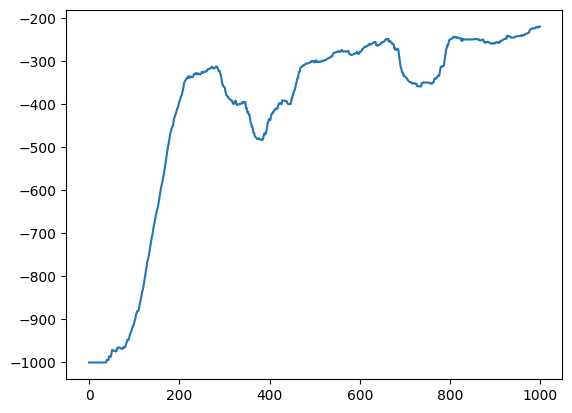

In [31]:
mean_rewards = np.zeros(NUM_EPISODES)
for t in range(NUM_EPISODES):
    mean_rewards[t] = np.mean(rewards_per_episode[max(0, t-100):(t+1)])
plt.plot(mean_rewards)